In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.ours import ours

from utils import load_diabetes, train_val_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

# Loading Data

In [4]:
data = load_diabetes()

n_train = 500
n_val = 150

# Execution

In [7]:
epochs = 80
seeds = 100

In [8]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'ours': {
        'gam': 12,
        'eta': 0.01
    }
}

In [9]:
metrics = {}
variables = {}

algs = ['ours', 'lv_hba', 'gam']

for a in algs:
    metrics[a] = []
    variables[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics[alg].append(metrics_seed)
        variables[alg].append(variables_seed)
    print("DONE")

Starting seed 1/100: ours lv_hba gam DONE
Starting seed 2/100: ours lv_hba gam DONE
Starting seed 3/100: ours lv_hba gam DONE
Starting seed 4/100: ours lv_hba gam DONE
Starting seed 5/100: ours lv_hba gam DONE
Starting seed 6/100: ours lv_hba gam DONE
Starting seed 7/100: ours lv_hba gam DONE
Starting seed 8/100: ours lv_hba gam DONE
Starting seed 9/100: ours lv_hba gam DONE
Starting seed 10/100: ours lv_hba gam DONE
Starting seed 11/100: ours lv_hba gam DONE
Starting seed 12/100: ours lv_hba gam DONE
Starting seed 13/100: ours 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


lv_hba gam DONE
Starting seed 14/100: ours lv_hba gam DONE
Starting seed 15/100: ours lv_hba gam DONE
Starting seed 16/100: ours lv_hba gam DONE
Starting seed 17/100: ours lv_hba gam DONE
Starting seed 18/100: ours lv_hba gam DONE
Starting seed 19/100: ours lv_hba gam DONE
Starting seed 20/100: ours lv_hba gam DONE
Starting seed 21/100: ours lv_hba gam DONE
Starting seed 22/100: ours lv_hba gam DONE
Starting seed 23/100: ours lv_hba gam DONE
Starting seed 24/100: ours lv_hba gam DONE
Starting seed 25/100: ours lv_hba gam DONE
Starting seed 26/100: ours lv_hba gam DONE
Starting seed 27/100: ours lv_hba gam DONE
Starting seed 28/100: ours lv_hba gam DONE
Starting seed 29/100: ours lv_hba gam DONE
Starting seed 30/100: ours lv_hba gam DONE
Starting seed 31/100: ours lv_hba gam DONE
Starting seed 32/100: ours lv_hba gam DONE
Starting seed 33/100: ours lv_hba gam DONE
Starting seed 34/100: ours lv_hba gam DONE
Starting seed 35/100: ours lv_hba gam DONE
Starting seed 36/100: ours lv_hba gam 

# Evaluation

In [10]:
metrics_lvhba = metrics['lv_hba']
metrics_gam = metrics['gam']
metrics_ours = metrics['ours']

axis_lvhba = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_gam]).mean(0)
axis_ours = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_ours]).mean(0)

axis_iter = np.arange(epochs)

In [11]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_gam])
train_acc_ours = np.array([[x['train_acc_F'] for x in metrics] for metrics in metrics_ours])

val_acc_lvhba = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_gam])
val_acc_ours = np.array([[x['val_acc_F'] for x in metrics] for metrics in metrics_ours])

test_acc_lvhba = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_gam])
test_acc_ours = np.array([[x['test_acc_F'] for x in metrics] for metrics in metrics_ours])

In [12]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
val_loss_ours = np.array([[x['val_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
test_loss_ours = np.array([[x['test_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_gam])[:,1:]
lower_loss_ours = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_ours])[:,1:]

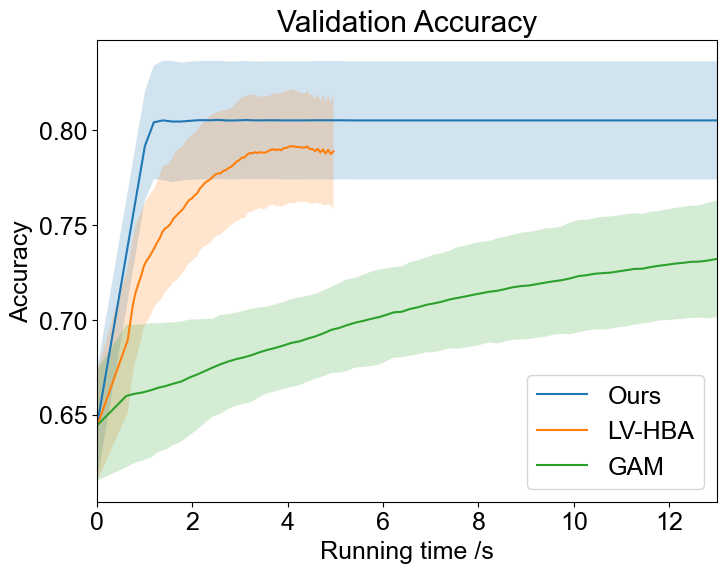

In [13]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_ours,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig('val_accuracy_running_time.pdf', bbox_inches="tight")

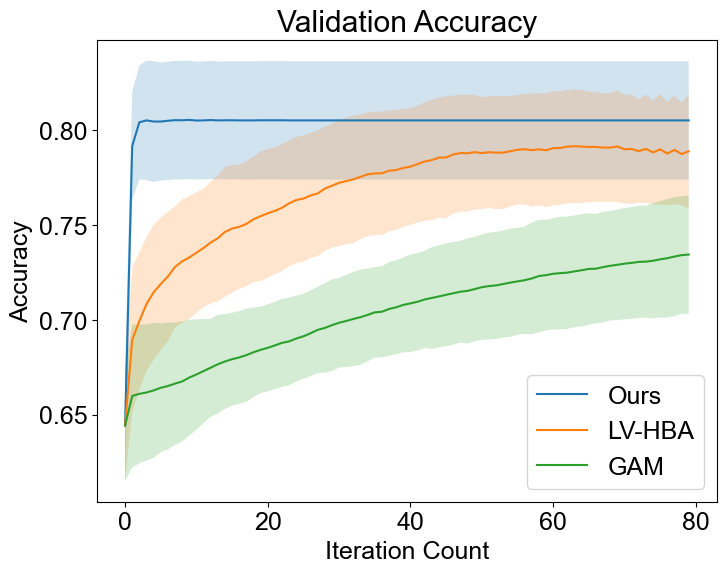

In [14]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_iter,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


plt.savefig('val_accuracy_iteration.pdf', bbox_inches="tight")

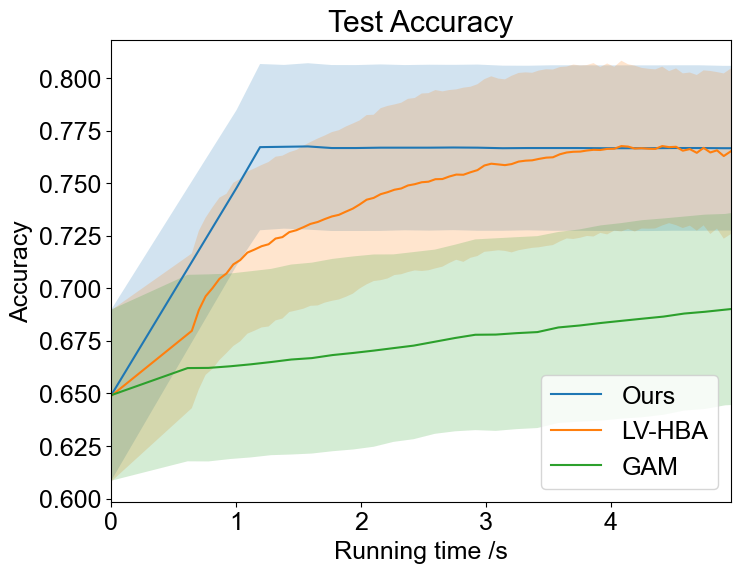

In [23]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig('test_accuracy_running_time.pdf', bbox_inches="tight")

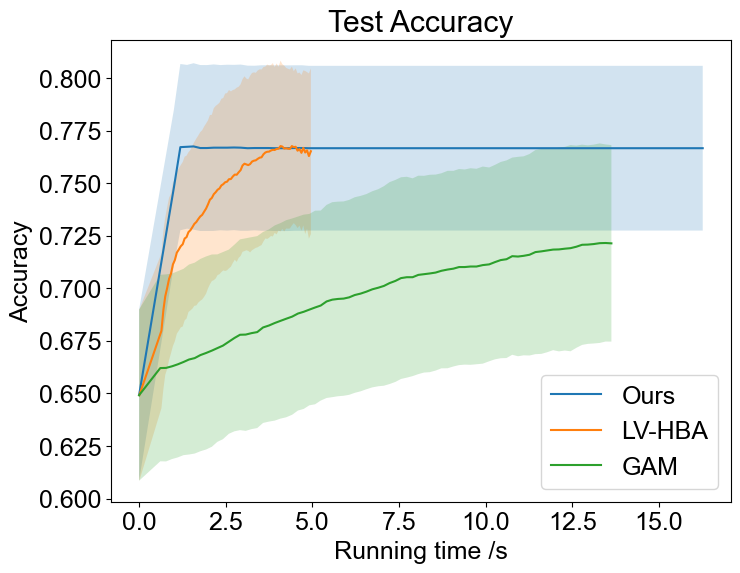

In [24]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")


plt.savefig('test_accuracy_running_time.pdf', bbox_inches="tight")

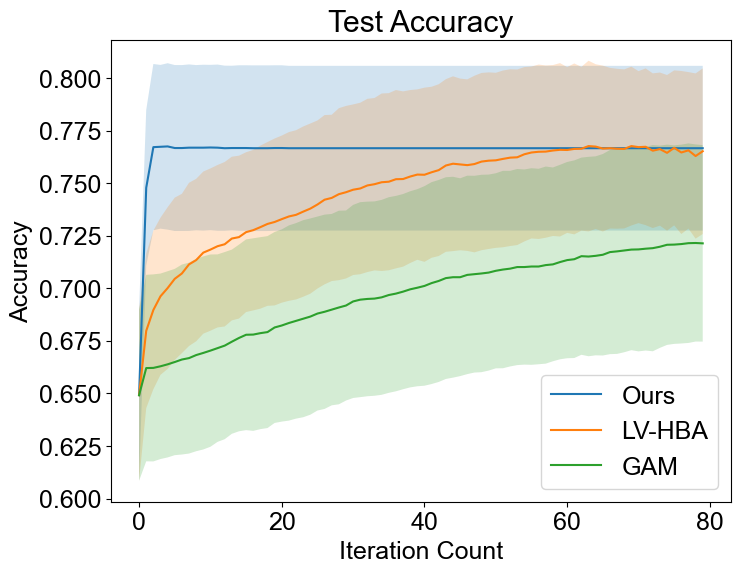

In [16]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_ours.mean(0),'-',label="Ours")
plt.fill_between(axis_iter,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig('test_accuracy_iteration.pdf', bbox_inches="tight")

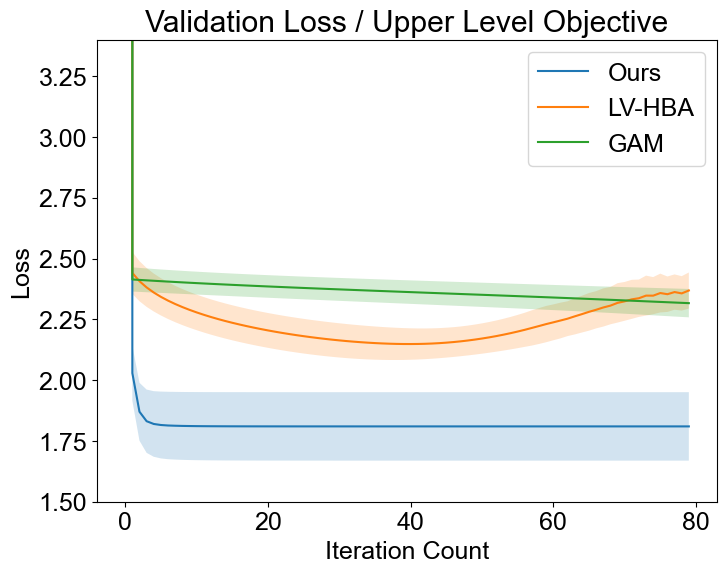

In [17]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_ours.mean(0),'-',label="Ours")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig('upper_obj_iteration.pdf', bbox_inches="tight")

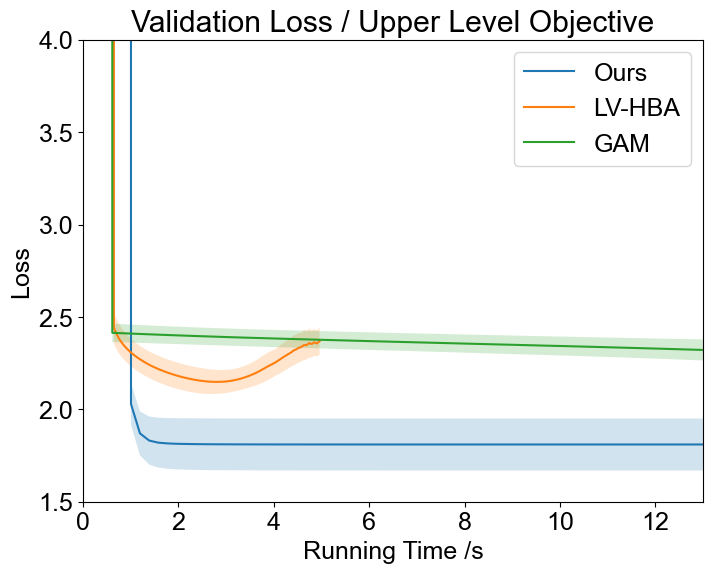

In [18]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_loss_ours.mean(0),'-',label="Ours")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(axis_ours[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig('upper_obj_time.pdf', bbox_inches="tight")

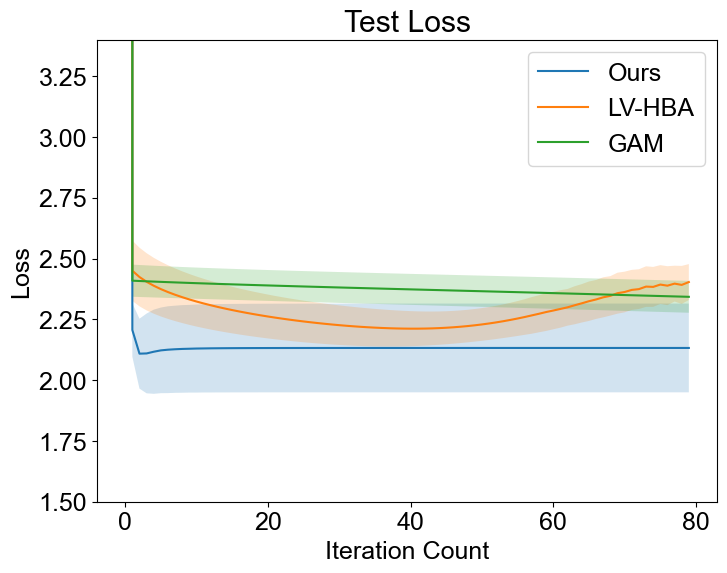

In [19]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_ours.mean(0),'-',label="Ours")
fill_dn_ours = test_loss_ours.mean(0)-test_loss_ours.std(0)
fill_up_ours = test_loss_ours.mean(0)+test_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig('test_obj_iteration.pdf', bbox_inches="tight")

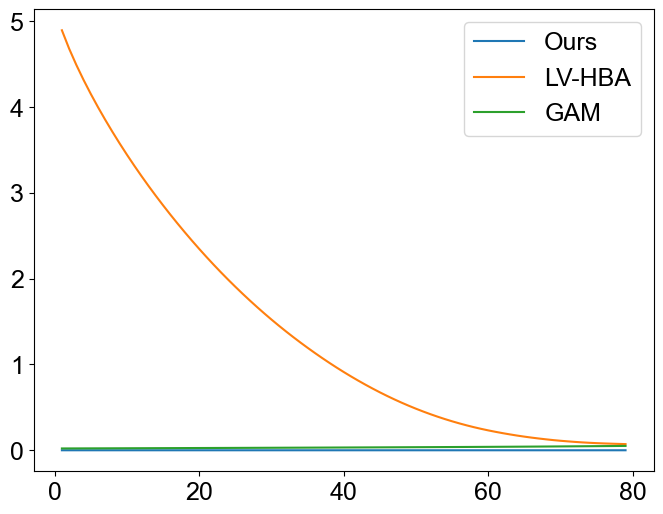

In [20]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_ours.mean(0),'-',label="Ours")
# fill_dn_ours = lower_loss_ours.mean(0)-lower_loss_ours.std(0)
# fill_up_ours = lower_loss_ours.mean(0)+lower_loss_ours.std(0)
# plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
# fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
# fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
# plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
# fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
# fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
# plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
# plt.title('Lower Loss')
# plt.xlabel('Iteration Count')
# plt.ylabel("Loss")

plt.savefig('lower_obj_iteration.pdf', bbox_inches="tight")